# Exploring the Accuracy of Alias Frequency Across Four Nyquist Zones
### February 9, 2026
### Olivia Wagner
### Group Members: Anissa Pokorny-Yadav, Andrew McHaty, Emilee Brown, and Kai Jaffarove

<span style="color:darkgreen; font-size:30px;">
    Abstract
</span>

This report presents the findings of two experiments conducted in UC Berkeley’s Radio Astronomy Laboratory on investigating digital signal sampling, aliasing, and frequency mixing. 

In our first experiment, a sinusoidal signal was digitally sampled and reconstructed to examine the effects of sampling rate, Nyquist frequency, spectral leakage, and aliasing across multiple Nyquist zones. We used Fourier-based techniques, including the Discrete Fourier Transform (DFT), Fast Fourier Transform (FFT), and Inverse Fourier Transform (IFT), to analyze the signal in both the time and frequency domains. 

The second experiment explored signal combination using double-sideband (DSB) and single-sideband (SSB) mixers, emphasizing the role of real and imaginary components and complex signal representation. Power spectra derived from complex in-phase (I) and quadrature (Q) data were used to investigate the use of mixers on signaling data. Together, these experiments address how accurately measured alias frequencies match theoretical predictions as the input signal is swept across four Nyquist zones, and how a Software-Defined Radio's bandpass filter influences the observed aliased spectra.

<span style="color:darkgreen; font-size:30px;">
    1 Introduction
</span>

<span style="color:darkgreen; font-size:20px;">
    1.1 Background
</span>

In this lab, we explore the field of <span style= "color:darkgreen">signal analysis</span>, which focuses on the collection of data and extraction of its patterns — most notably voltage and power spectra, spectral leakage, frequency resolution, etc. Many physical signals are measured in the time domain, giving a base understanding of how the signal changes over time, but to gain insight into their behavior, we must transform the data into the frequency domain.

To convert from a time-dependent basis to one of frequency, we use a Forward Fourier Transform. Because the Fourier transform is an invertible mapping between bases, no information is lost in the process. Thus, allowing us to analyze signals in the frequency domain without altering their fundamental properties. The following Fourier transformations are used throughout this report:
- <span style="color:darkgreen">Forward Fourier Transform (FFT)</span>: \\[ \hat{f}(\omega) = F(f(t)) = \int_{-\infty}^{\infty} f(t) e^{-i\omega t} dt \\]
- <span style="color:darkgreen">Inverse Fourier Transform (IFT)</span>: \\[f(t) = F^{-1}(\hat{f}(\omega)) = \frac{1}{2\pi} \int_{-\infty}^{\infty} (\hat{f}(\omega)) e^{i\omega t} d\omega\\]

When measuring a signal, it is sampled discretely, meaning only a certain number of samples are taken per second. This introduces the <span style= "color:darkgreen">Nyquist Sampling Criterion</span>, which states that to reconstruct a signal accurately, your sampling frequency must be at least twice the measured frequency, as indicated below. If this condition is not satisfied, then <span style= "color:darkgreen">aliasing</span> will occur, which causes signal data to be indistinguishable from each other. More specifically, higher-frequency signals will appear as lower-frequency signals in the sampled data and vice versa.
- <span style="color:darkgreen">Nyquist Rate</span>: \\[ f_{sample} \ge 2f_{measured}\\]

Mixers are fundamental instruments in signal analysis, allowing us to combine two signals and translate a high-frequency radio-frequency (RF) signal down to a lower intermediate frequency (IF), which is easier to process and analyze. This frequency transformation enables filtering, amplification, and digitization of signals that would otherwise be impossible to analyze. Without mixers, most communication systems like radio broadcasting, cellular networks, and satellites would not be possible, and radio astronomers would be unable to detect extremely weak celestial signals.

In Section 2 of our report, we present our methods, data analysis, and interpretation of the first experiment on digitally sampling a sine wave. Section 3 focuses on the methods, data analysis, and interpretation of the second experiment on mixers.

<span style="color:darkgreen; font-size:20px;">
    1.2 Question
</span>

In this report, our goal is to answer the following question: how accurately does the measured alias frequency match its theoretical prediction, as the input signal frequency is compared across four Nyquist zones? How does turning on and off the bandpass filter affect aliased data?

<span style="color:darkgreen; font-size:30px;">
    2 Experiment #1: Digitally Sampling a Sine Wave
</span>

<span style="color:darkgreen; font-size:20px;">
    2.1 Methods
</span>

In our first experiment, we connected our Raspberry Pi and a Software-Defined Radio (SDR) to the function generator in the Radio Astronomy Lab. This allowed us to study the behavior of aliasing frequencies under controlled conditions. 

The function generator was set up to output a sinusoidal signal with a constant amplitude of 2.5 mV, while the input frequency was systematically varied. The sampling rate of the SDR was held fixed at 1 MHz (1000 kHz); thus, by the Nyquist sampling criterion (detailed in section 1.1 Background), this corresponds to a Nyquist frequency of 500 kHz and naturally divides the frequency axis into Nyquist zones of bandwidth 500 kHz.

For this report, we analyzed four Nyquist zones (Zones 0–3), measuring three input frequencies within each zone for a total of twelve frequencies. By collecting multiple data sets across these zones, we aimed to evaluate the agreement between theoretical aliasing predictions and our experimentally measured aliased frequencies.

In Nyquist Zone 0 (0 to 500 kHz), we measured 150 kHz, 250 kHz, and 350 kHz, giving a wide range of high and low frequencies within the zone. All of these frequencies are below the Nyquist frequency, meaning that no aliasing is expected in Zone 0. Rather, we will use Zone 0 to compare the measured (aliased) frequencies in other Nyquist zones. Theoretically, as we sweep across each Nyquist zone, our data should be symmetric about the Nyquist boundaries, which are integer multiples of 500 kHz.

In Nyquist Zones 1–3 (500 to 1000 kHz, 1000 to 1500 kHz, and 1500 to 2000 kHz, respectively), we measured frequencies chosen to correspond directly to those measured in Zone 0. Specifically, in Zone 1, we measured 650 kHz, 750 kHz, and 850 kHz; in Zone 2, 1150 kHz, 1250 kHz, and 1350 kHz; in Zone 3, 1650 kHz, 1750 kHz, and 1850 kHz. Each set of frequencies occupies the same relative position within its respective Nyquist zone as the reference frequencies in Zone 0. This allows us to directly compare how signals at symmetrically identical positions within each Nyquist zone are aliased into the baseband (ranging from -500 kHz to 500 kHz), and to evaluate whether the observed aliasing behavior matches theoretical predictions.

<span style="color:darkgreen; font-size:20px;">
    3.2 Data Analysis
</span>

In [368]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal 
from scipy.signal import correlate, correlation_lags

# My super awesome and cool package!
!pip install ./Coding_Data.py
# import Coding_Data as cd
# import dft as dft
# import importlib
# importlib.reload(cd)
# importlib.reload(dft)

ERROR: Invalid requirement: './Coding_Data.py': Expected package name at the start of dependency specifier
    ./Coding_Data.py
    ^
Hint: It looks like a path. File './Coding_Data.py' does not exist.


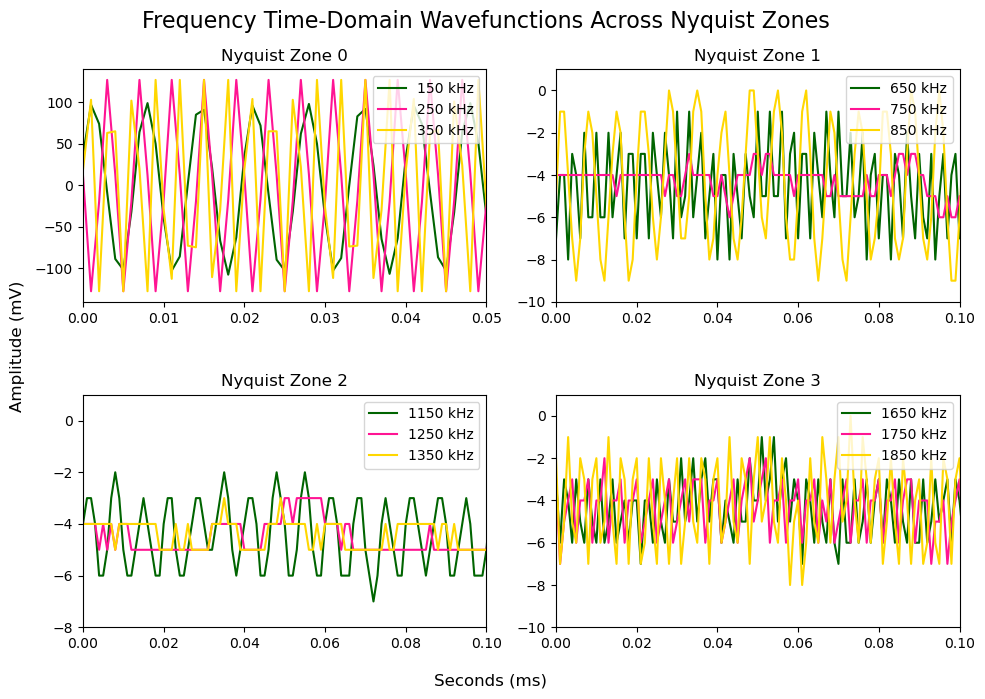

In [369]:
# ———————————————————— Plotting Amplitude vs. Time ————————————————————

fig, axes = plt.subplots(2, 2, figsize=(10, 7), sharey=False, sharex=False)

# ———————————————————— Nyquist Zone 0 ————————————————————
ax = axes[0, 0]
ax.plot(cd.t_Z0_150*1000, cd.Z0_150[1], color='darkgreen', label="150 kHz")
ax.plot(cd.t_Z0_250*1000, cd.Z0_250[1], color='deeppink', label="250 kHz")
ax.plot(cd.t_Z0_350*1000, cd.Z0_350[1], color='gold', label="350 kHz")
ax.set_title('Nyquist Zone 0')
ax.legend(loc='upper right')
ax.set_xlim(0, 0.05)

# ———————————————————— Nyquist Zone 1 ————————————————————
ax = axes[0, 1]
ax.plot(cd.t_Z1_650*1000, cd.Z1_650[1], color='darkgreen', label="650 kHz")
ax.plot(cd.t_Z1_750*1000, cd.Z1_750[1], color='deeppink', label="750 kHz")
ax.plot(cd.t_Z1_850*1000, cd.Z1_850[1], color='gold', label="850 kHz")
ax.set_title('Nyquist Zone 1')
ax.legend(loc='upper right')
ax.set_xlim(0, 0.10)
ax.set_ylim(-10, 1)

# ———————————————————— Nyquist Zone 2 ————————————————————
ax = axes[1, 0]
ax.plot(cd.t_Z2_1150*1000, cd.Z2_1150[1], color='darkgreen', label="1150 kHz")
ax.plot(cd.t_Z2_1250*1000, cd.Z2_1250[1], color='deeppink', label="1250 kHz")
ax.plot(cd.t_Z2_1350*1000, cd.Z2_1350[1], color='gold', label="1350 kHz")
ax.set_title('Nyquist Zone 2')
ax.legend(loc='upper right')
ax.set_xlim(0, 0.10)
ax.set_ylim(-8, 1)

# ———————————————————— Nyquist Zone 3 ————————————————————
ax = axes[1, 1]
ax.plot(cd.t_Z3_1650*1000, cd.Z3_1650[1], color='darkgreen', label="1650 kHz")
ax.plot(cd.t_Z3_1750*1000, cd.Z3_1750[1], color='deeppink', label="1750 kHz")
ax.plot(cd.t_Z3_1850*1000, cd.Z3_1850[1], color='gold', label="1850 kHz")
ax.set_title('Nyquist Zone 3')
ax.legend(loc='upper right')
ax.set_xlim(0, 0.10)
ax.set_ylim(-10, 1)

fig.supxlabel('Seconds (ms)')
fig.supylabel('Amplitude (mV)')
fig.suptitle('Frequency Time-Domain Wavefunctions Across Nyquist Zones ', fontsize=16)
plt.tight_layout()
fig.subplots_adjust(hspace=0.4)

<span style="color:darkgreen">Fig. 1.</span> Time-domain voltage plots corresponding to the measured frequencies in each Nyquist zone. Each plot shows the reconstructed time-domain signal for three input frequencies within a given Nyquist zone, with Nyquist Zone 0 shown in the upper left and Nyquist Zone 3 shown in the lower right. The amplitude was held constant at 2.5 mV for all measurements.

In Nyquist Zone 0, where all input frequencies lie below the Nyquist frequency, the waveforms appear in a clear sinusoidal pattern. They have the most stable amplitudes and well-defined periodic structures. However, for Nyquist Zones 1–3, where the input frequencies exceed the Nyquist frequency, the sampled signals undergo aliasing, resulting in lower-frequency oscillations appearing. Although the true input frequencies differ between zones, signals occupying the same relative position within each Nyquist zone map onto similar aliased frequencies, producing comparable oscillatory behavior across zones.

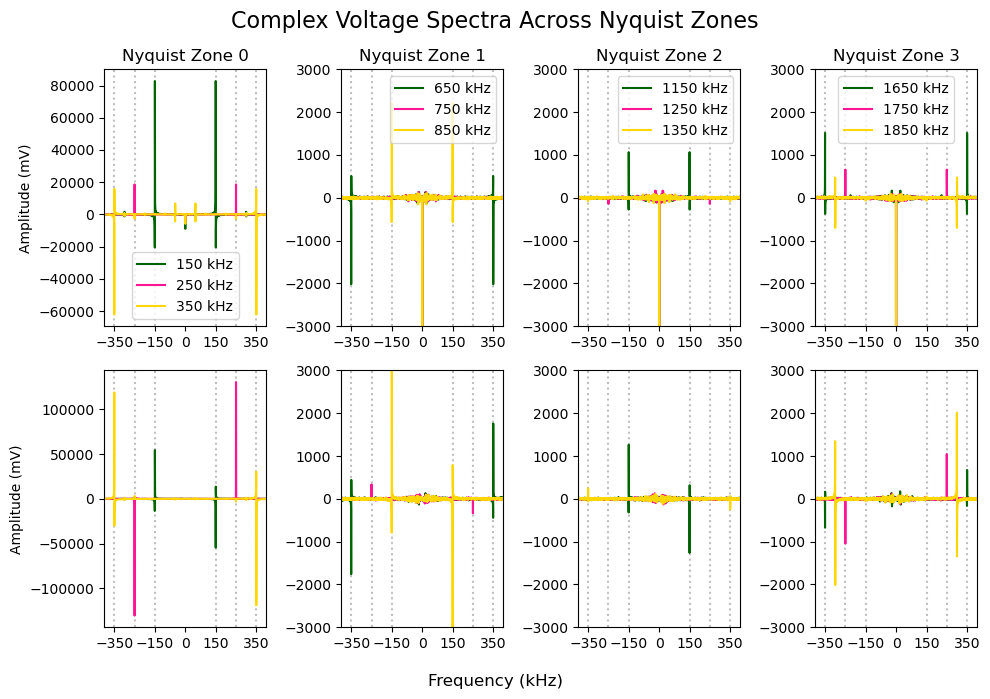

In [371]:
# ———————————————————— Plotting Complex Voltage Spectra ————————————————————

fig, axes = plt.subplots(2, 4, figsize=(10, 7), sharey=False, sharex=False)

# ———————————————————— Nyquist Zone 0 ————————————————————
ax = axes[0, 0]
ax.plot(cd.Shift_freq150 / 1e3, np.real(cd.Shift_Xf_150), color='darkgreen', label="150 kHz")
ax.plot(cd.Shift_freq250 / 1e3, np.real(cd.Shift_Xf_250), color='deeppink', label="250 kHz")
ax.plot(cd.Shift_freq350 / 1e3, np.real(cd.Shift_Xf_350), color='gold', label="350 kHz")
ax.set_title('Nyquist Zone 0')
ax.set_xlim(-400, 400)
# ax.set_ylim(-50, 50)
ax.set_xticks([-350, -150, 0, 150, 350])
ax.set_ylabel('Amplitude (mV)')
ax.legend(loc='lower center')

ax = axes[1, 0]
ax.plot(cd.Shift_freq150 / 1e3, np.imag(cd.Shift_Xf_150), color='darkgreen', label="150 kHz")
ax.plot(cd.Shift_freq250 / 1e3, np.imag(cd.Shift_Xf_250), color='deeppink', label="250 kHz")
ax.plot(cd.Shift_freq350 / 1e3, np.imag(cd.Shift_Xf_350), color='gold', label="350 kHz")
# ax.set_title('Nyquist Zone 0')
ax.set_xlim(-400, 400)
ax.set_xticks([-350, -150, 0, 150, 350])
ax.set_ylabel('Amplitude (mV)')
# ax.legend()

# ———————————————————— Nyquist Zone 1 ————————————————————
ax = axes[0, 1]
ax.plot(cd.Shift_freq650 / 1e3, np.real(cd.Shift_Xf_650), color='darkgreen', label="650 kHz")
ax.plot(cd.Shift_freq750 / 1e3, np.real(cd.Shift_Xf_750), color='deeppink', label="750 kHz")
ax.plot(cd.Shift_freq850 / 1e3, np.real(cd.Shift_Xf_850), color='gold', label="850 kHz")
ax.set_title('Nyquist Zone 1')
ax.set_xlim(-400, 400)
ax.set_ylim(-3000, 3000)
ax.set_xticks([-350, -150, 0, 150, 350])
ax.legend()

ax = axes[1, 1]
ax.plot(cd.Shift_freq650 / 1e3, np.imag(cd.Shift_Xf_650), color='darkgreen', label="650 kHz")
ax.plot(cd.Shift_freq750 / 1e3, np.imag(cd.Shift_Xf_750), color='deeppink', label="750 kHz")
ax.plot(cd.Shift_freq850 / 1e3, np.imag(cd.Shift_Xf_850), color='gold', label="850 kHz")
# ax.set_title('Nyquist Zone 1')
ax.set_xlim(-400, 400)
ax.set_ylim(-3000, 3000)
ax.set_xticks([-350, -150, 0, 150, 350])
# ax.legend()

# ———————————————————— Nyquist Zone 2 ————————————————————
ax = axes[0, 2]
ax.plot(cd.Shift_freq1150 / 1e3, np.real(cd.Shift_Xf_1150), color='darkgreen', label="1150 kHz")
ax.plot(cd.Shift_freq1250 / 1e3, np.real(cd.Shift_Xf_1250), color='deeppink', label="1250 kHz")
ax.plot(cd.Shift_freq1350 / 1e3, np.real(cd.Shift_Xf_1350), color='gold', label="1350 kHz")
ax.set_title('Nyquist Zone 2')
ax.set_xlim(-400, 400)
ax.set_ylim(-3000, 3000)
ax.set_xticks([-350, -150, 0, 150, 350])
ax.legend()

ax = axes[1, 2]
ax.plot(cd.Shift_freq1150 / 1e3, np.imag(cd.Shift_Xf_1150), color='darkgreen', label="1150 kHz")
ax.plot(cd.Shift_freq1250 / 1e3, np.imag(cd.Shift_Xf_1250), color='deeppink', label="1250 kHz")
ax.plot(cd.Shift_freq1350 / 1e3, np.imag(cd.Shift_Xf_1350), color='gold', label="1350 kHz")
# ax.set_title('Nyquist Zone 2')
ax.set_xlim(-400, 400)
ax.set_ylim(-3000, 3000)
ax.set_xticks([-350, -150, 0, 150, 350])
# ax.legend()

# ———————————————————— Nyquist Zone 3 ————————————————————
ax = axes[0, 3]
ax.plot(cd.Shift_freq1650 / 1e3, np.real(cd.Shift_Xf_1650), color='darkgreen', label="1650 kHz")
ax.plot(cd.Shift_freq1750 / 1e3, np.real(cd.Shift_Xf_1750), color='deeppink', label="1750 kHz")
ax.plot(cd.Shift_freq1850 / 1e3, np.real(cd.Shift_Xf_1850), color='gold', label="1850 kHz")
ax.set_title('Nyquist Zone 3')
ax.set_xlim(-400, 400)
ax.set_ylim(-3000, 3000)
ax.set_xticks([-350, -150, 0, 150, 350])
ax.legend()

ax = axes[1, 3]
ax.plot(cd.Shift_freq1650 / 1e3, np.imag(cd.Shift_Xf_1650), color='darkgreen', label="1650 kHz")
ax.plot(cd.Shift_freq1750 / 1e3, np.imag(cd.Shift_Xf_1750), color='deeppink', label="1750 kHz")
ax.plot(cd.Shift_freq1850 / 1e3, np.imag(cd.Shift_Xf_1850), color='gold', label="1850 kHz")
# ax.set_title('Nyquist Zone 3')
ax.set_xlim(-400, 400)
ax.set_ylim(-3000, 3000)
ax.set_xticks([-350, -150, 0, 150, 350])
# ax.legend()

# Adding dotted lines where the expected frequency peaks are
x_lines = [-350, -250, -150, 150, 250, 350]
for ax in axes.flat:
    for x in x_lines:
        ax.axvline(x=x, color='gray', linestyle=':', alpha=0.5, zorder=0)

fig.supxlabel('Frequency (kHz)')
fig.suptitle('Complex Voltage Spectra Across Nyquist Zones', fontsize=16)
fig.subplots_adjust(hspace=0.4)
plt.tight_layout()
plt.show()

<span style="color:darkgreen">Fig. 2.</span> The top row depicts the real elements of the complex voltage spectrum, while the bottom row depicts the imaginary elements of the complex voltage spectrum, both plotted in Amplitude (mV) vs. Frequency (kHz). Each column depicts a Nyquist zone, with Zone 0 on the left and Zone 3 on the right.

In order to accurately plot the data, the frequency values and frequency bins were both shifted using a Fast Fourier Transform (FFT) function, see background for more details. This reorders the elements in each array, putting the negative frequencies on the left and the positive frequencies on the right. In this sense, negative frequencies represent complex exponentials rotating in the opposite direction in the complex plane. They are complex conjugates of the positive-frequency components for a real-valued signal.

The real components represent the portion of the signal that is in phase with a cosine wave, while the imaginary components represent the portion of the signal that is 90° out of phase with a cosine wave, which is equivalently in phase with a sine wave.

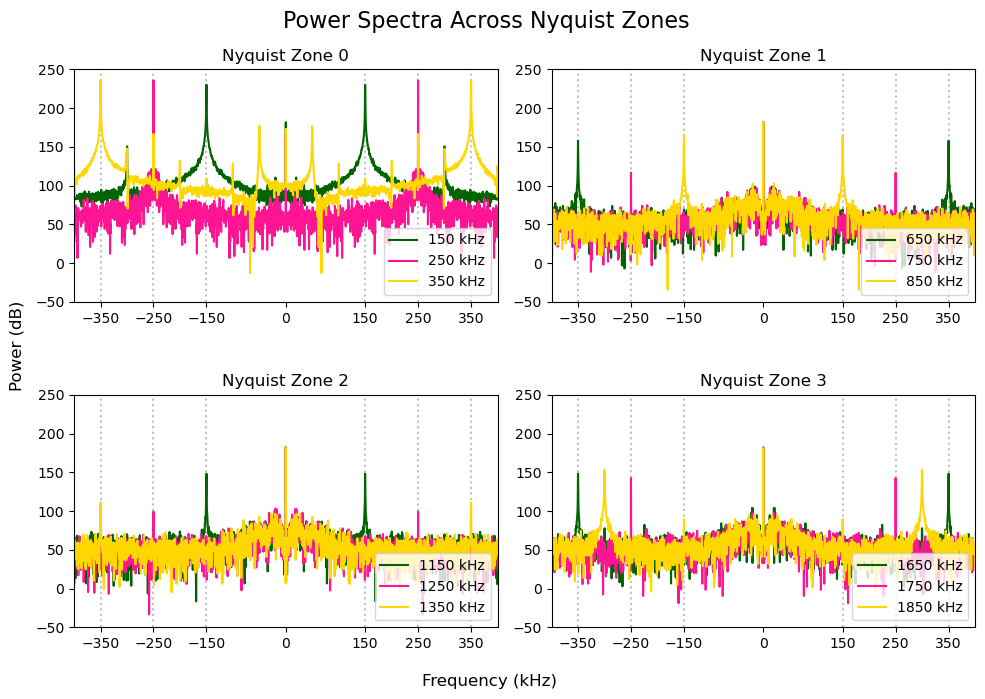

In [373]:
# ———————————————————— Plotting Power Spectra ————————————————————

fig, axes = plt.subplots(2, 2, figsize=(10, 7), sharey=False)

# ———————————————————— Nyquist Zone 0 ————————————————————
ax = axes[0, 0]
ax.plot(cd.Shift_freq150 / 1e3, 10*np.log(cd.Shift_P_150), color='darkgreen', label='150 kHz')
ax.plot(cd.Shift_freq250 / 1e3, 10*np.log(cd.Shift_P_250), color='deeppink', label='250 kHz')
ax.plot(cd.Shift_freq350 / 1e3, 10*np.log(cd.Shift_P_350), color='gold', label='350 kHz')
ax.set_title('Nyquist Zone 0')
ax.set_xlim(-400, 400)
ax.set_ylim(-50, 250)
ax.legend(loc='lower right')
ax.set_xticks([-350, -250, -150, 0, 150, 250, 350])

# ———————————————————— Nyquist Zone 1 ————————————————————
ax = axes[0, 1]
ax.plot(cd.Shift_freq650 / 1e3, 10*np.log(cd.Shift_P_650), color='darkgreen', label='650 kHz')
ax.plot(cd.Shift_freq750 / 1e3, 10*np.log(cd.Shift_P_750), color='deeppink', label='750 kHz')
ax.plot(cd.Shift_freq850 / 1e3, 10*np.log(cd.Shift_P_850), color='gold', label='850 kHz')
ax.set_title('Nyquist Zone 1')
ax.set_xlim(-400, 400)
ax.set_ylim(-50, 250)
ax.legend(loc='lower right')
ax.set_xticks([-350, -250, -150, 0, 150, 250, 350])

# ———————————————————— Nyquist Zone 2 ————————————————————
ax = axes[1, 0]
ax.plot(cd.Shift_freq1150 / 1e3, 10*np.log(cd.Shift_P_1150), color='darkgreen', label='1150 kHz')
ax.plot(cd.Shift_freq1250 / 1e3, 10*np.log(cd.Shift_P_1250), color='deeppink', label='1250 kHz')
ax.plot(cd.Shift_freq1350 / 1e3, 10*np.log(cd.Shift_P_1350), color='gold', label='1350 kHz')
ax.set_title('Nyquist Zone 2')
ax.set_xlim(-400, 400)
ax.set_ylim(-50, 250)
ax.legend(loc='lower right')
ax.set_xticks([-350, -250, -150, 0, 150, 250, 350])

# ———————————————————— Nyquist Zone 3 ————————————————————
ax = axes[1, 1]
ax.plot(cd.Shift_freq1650 / 1e3, 10*np.log(cd.Shift_P_1650), color='darkgreen', label='1650 kHz')
ax.plot(cd.Shift_freq1750 / 1e3, 10*np.log(cd.Shift_P_1750), color='deeppink', label='1750 kHz')
ax.plot(cd.Shift_freq1850 / 1e3, 10*np.log(cd.Shift_P_1850), color='gold', label='1850 kHz')
ax.set_title('Nyquist Zone 3')
ax.set_xlim(-400, 400)
ax.set_ylim(-50, 250)
ax.legend(loc='lower right')
ax.set_xticks([-350, -250, -150, 0, 150, 250, 350])

x_lines = [-350, -250, -150, 150, 250, 350]
for ax in axes.flat:
    for x in x_lines:
        ax.axvline(x=x, color='gray', linestyle=':', alpha=0.5, zorder=0)

fig.suptitle('Power Spectra Across Nyquist Zones ', fontsize=16)
fig.supxlabel('Frequency (kHz)')
fig.supylabel('Power (dB)')
plt.tight_layout()
fig.subplots_adjust(hspace=0.4)
plt.show()

<span style="color:darkgreen">Fig. 3.</span> Power spectra of the twelve measured input frequencies across Nyquist Zones 0–3. Each subplot shows three input frequencies within the corresponding Nyquist zone. The gray dotted vertical lines indicate the theoretically predicted aliased frequencies based on the sampling rate and Nyquist frequency. In Nyquist Zones 1 and 2, the measured spectral peaks align closely with the expected alias locations. Additionally, the transition from Zone 0 to Zone 1 demonstrates spectral inversion due to aliasing. For example, looking at the plot on Nyquist Zone 1, an input frequency of 650 kHz (dark green) aliases to a measured peak at 350 kHz. Being the lowest frequency in the zone, it is easy to think it should peak at 150 kHz — the same place that the 150 kHz frequency peaks. However, due to the nature of Nyquist zones, the peak at 350 kHz is expected.

Now, looking at 'Nyquist Zone 3', we see a diversion from the expected aliased frequencies. The yellow peak, corresponding to a frequency of 1850 kHz, does have a small peak at the expected value of 150 kHz; however, notice that its strongest peak is at 300 kHz, which does not correspond to any of the previous peaks in frequency.

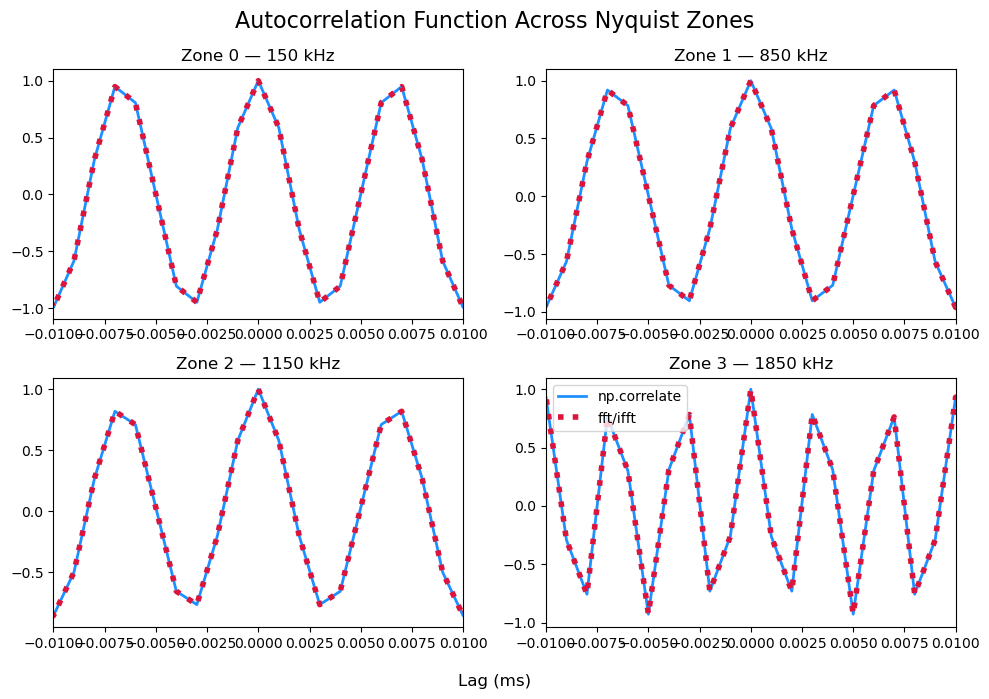

In [375]:
# ———————————————————— Plotting the Autocorrelation Function ————————————————————

fig, axes = plt.subplots(2, 2, figsize=(10, 7), sharey=False, sharex=False)

# 150 kHz
ax = axes[0, 0]
ax.plot(cd.lags_150*1e3, cd.ACF_150, color='dodgerblue', label="np.correlate", linewidth=2)
ax.plot(cd.lags_150*1e3, cd.ACF_powspec_150, color='crimson', label="fft/ifft", linestyle=':', linewidth=4)
ax.set_xlim([-0.01,0.01])
ax.set_title('Zone 0 — 150 kHz')

# 850 kHz
ax = axes[0, 1]
ax.plot(cd.lags_850*1e3, cd.ACF_850, color='dodgerblue', label="np.correlate", linewidth=2)
ax.plot(cd.lags_850*1e3, cd.ACF_powspec_850, color='crimson', label="fft/ifft", linestyle=':', linewidth=4)
ax.set_xlim([-0.01,0.01])
ax.set_title('Zone 1 — 850 kHz')

# 1150 kHz
ax = axes[1, 0]
ax.plot(cd.lags_1150*1e3, cd.ACF_1150, color='dodgerblue', label="np.correlate", linewidth=2)
ax.plot(cd.lags_1150*1e3, cd.ACF_powspec_1150, color='crimson', label="fft/ifft", linestyle=':', linewidth=4)
ax.set_xlim([-0.01,0.01])
ax.set_title('Zone 2 — 1150 kHz')

# 1850 kHz
ax = axes[1, 1]
ax.plot(cd.lags_1850*1e3, cd.ACF_1850, color='dodgerblue', label="np.correlate", linewidth=2)
ax.plot(cd.lags_1850*1e3, cd.ACF_powspec_1850, color='crimson', label="fft/ifft", linestyle=':', linewidth=4)
ax.set_xlim([-0.01,0.01])
ax.set_title('Zone 3 — 1850 kHz')
ax.legend(loc='upper left')

fig.suptitle('Autocorrelation Function Across Nyquist Zones', fontsize=16)
fig.supxlabel('Lag (ms)')
# fig.supylabel('No Units')
fig.subplots_adjust(hspace=0.4)
plt.tight_layout()
plt.show()

<span style="color:darkgreen">Fig. 4.</span> The autocorrelation of one measured frequency from each Nyquist zone, 150 kHz (Zone 0, upper left), 850 kHz (Zone 1, upper right), 1150 kHz (Zone 2, lower left), and 1850 kHz (Zone 3, lower right). The two autocorrelations were computed using both direct correlation (np.correlate, dotted crimson) and the inverse Fourier transform of the power spectrum (solid blue), which are plotted on top of each other, showing their direct equivalence. Each of these frequencies was chosen based on the predicted aliasing effects, since 150 kHz, 850 kHz, 1150 kHz, and 1850 kHz are all expected to peak in their voltage spectrum and power spectrum at the same frequency (150 kHz). This effect was observed at three of the four measured frequencies, with 1850 kHz as the outlier (see Fig. 2 and Fig. 3 for more information).

In their autocorrelation function, we see that the ACFs of Zones 0–2 are essentially indistinguishable, oscillating with the same amplitude and period. This confirms that frequencies that alias to the same discrete-time frequency produce identical autocorrelations after sampling. However, Zone 3 deviates from the theory, producing an ACF that has a smaller period. This discrepancy is likely linked to the tools and instruments being non-ideal, which affects the aliasing consistency.

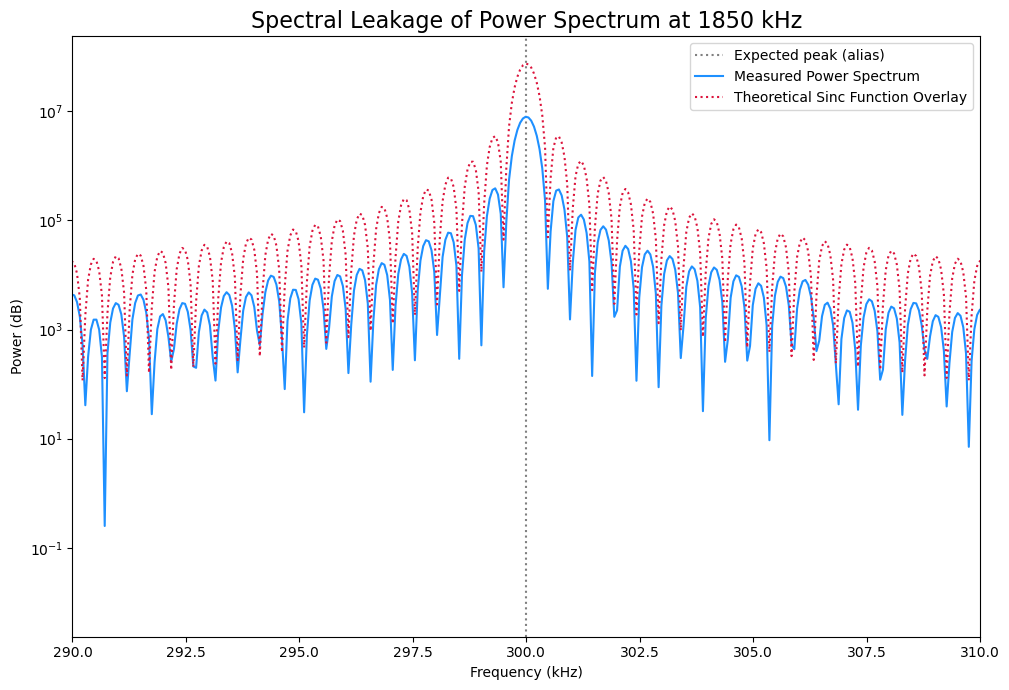

In [407]:
# ---------------- Plotting the Leakage Power ----------------

T = cd.N_1850 / cd.sampling_frequency
freq_alias = 300e3
theory_sinc = np.sinc(T * (cd.frequency_oversamp - freq_alias)) ** 2
theory_sinc = theory_sinc * (np.max(cd.power_spec[:cd.inc_N // 2]) / np.max(theory_sinc[:cd.inc_N // 2]))

plt.figure(figsize=(10, 7))
plt.axvline(freq_alias/1e3, color='gray', label='Expected peak (alias)', linestyle=':')
plt.semilogy(cd.frequency_oversamp[:cd.inc_N // 2] / 1e3, cd.power_spec[:cd.inc_N // 2], color='dodgerblue',
             label='Measured Power Spectrum')
plt.semilogy(cd.frequency_oversamp[:cd.inc_N // 2]/ 1e3, theory_sinc[:cd.inc_N // 2], color='crimson',
             label='Theoretical Sinc Function Overlay', linestyle=':')
plt.xlabel("Frequency (kHz)")
plt.ylabel("Power (dB)")
plt.title("Spectral Leakage of Power Spectrum at 1850 kHz", fontsize=16)
plt.legend()
plt.tight_layout()
plt.xlim(290, 310)
plt.show()

# Used AI to help plot the theoretical sinc function, specifically, move it to lay over the power spectrum

<span style="color:darkgreen">Fig. 5.</span> Power spectrum of a 1850 kHz frequency, computed using a discrete Fourier transform and a higher frequency sampling density. The measured power spectrum, shown by the solid blue line, has a strong central peak at 300 kHz with power distributed into the surrounding frequencies, demonstrating spectral leakage. Spectral leakage occurs because sampling is limited to a finite number of samples per second, causing its power to leak around the peak power. The crimson dotted line represents the theoretical sinc-squared function, which is aligned and normalized to the measured spectrum, thus following the same overall shape. Notice that the two curves have the dips in power at the same locations; however, the crimson curve is shifted upwards. Because units of power are arbitrary, we can compare the features of both the power spectrum and the sinc function, both of which demonstrate consistency with measurements and theory.

It's important to note that the 1850 kHz measured frequency was not expected to peak at 300 kHz. Instead, it is expected to peak at 150 kHz due to aliasing. We still see a pattern of spectral leakage in its power spectrum.

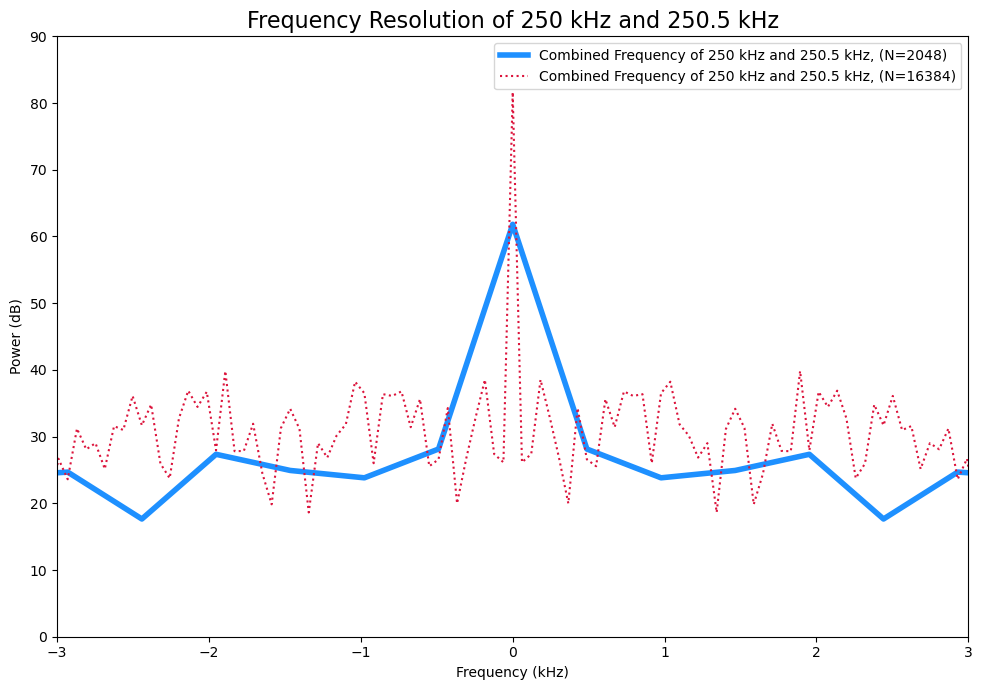

In [379]:
# ———————————————————— Plotting the Frequency Resolution ————————————————————

plt.figure(figsize=(10, 7))
plt.plot(cd.freq2048_1 / 1e3, 10*np.log10(cd.power_2048_1 + 1e-20), color='dodgerblue', 
         label='Combined Frequency of 250 kHz and 250.5 kHz, (N=2048)', linewidth=4)
plt.plot(cd.freq16384_1 / 1e3, 10*np.log10(cd.power_16384_1 + 1e-20), color='crimson', 
        label='Combined Frequency of 250 kHz and 250.5 kHz, (N=16384)', linestyle=':')
plt.xlabel("Frequency (kHz)")
plt.ylabel("Power (dB)")
plt.title("Frequency Resolution of 250 kHz and 250.5 kHz", fontsize=16)
plt.legend()
plt.tight_layout()
plt.xlim(-3, 3)
plt.ylim(0,90)
plt.show()

<span style="color:darkgreen">Fig. 6.</span> Power spectrum of two combined signals at 250 kHz and 250.5 kHz, generated using two function generators, both connected to a power splitter in reverse. The solid blue curve shows the spectrum computed using 2048 samples, while the dotted crimson curve uses 16384 samples in the Fourier transform. With a smaller number of samples, the blue curve's frequency resolution is hard to measure (about 0.5 kHz per point), causing the two signals to be unresolved and appear as a single broadened peak. Increasing the number of samples improves the frequency resolution (about 0.1 kHz per point), producing a sharper spectrum and allowing the two closely spaced frequencies to be more accurately represented.

In [381]:
# ———————————————————— NOISE — COME BACK TO ————————————————————
# with np.load("noise_3000000Hz_16blocks.npz") as data:
#     noise = data['arr_0']

<span style="color:darkgreen; font-size:20px;">3.3 Interpretation</span>

Throughout our measurements of a digitally sampled sine wave, we identified clear and repeatable patterns of aliasing across four Nyquist zones. In Nyquist Zone 0 (0 – 500 kHz), no aliasing is observed, since all three measured input frequencies — 150 kHz, 250 kHz, and 350 kHz — are below the Nyquist frequency, which is 500 kHz. As a result, Zone 0 serves as a baseline for comparison across all the above analyses (Fig. 1, Fig. 2, Fig 3, Fig. 4). In this zone, the complex voltage and power spectra peak at the expected input frequencies, and the autocorrelation function (ACF) accurately reflects the true signal period and structure.

In Nyquist Zone 1 (500 – 1000 kHz), aliasing begins to appear because all measured input frequencies exceed the Nyquist frequency — 650 kHz, 750 kHz, and 850 kHz. Because of this, the measured frequencies are reflected about the Nyquist frequency border and reappear at lower, aliased frequencies within the baseband. Although the measured input frequencies differ from those in Zone 0, the resulting aliased frequencies match the theoretical predictions and align with the corresponding Zone 0 frequencies. This causes 650 kHz ±350 kHz, 750 kHz to alias to ±250 kHz, and 850 kHz to alias to ±150 kHz, which is an inverted representation. The measured behavior in our report is consistently observed in both the complex voltage spectra and power spectra, while the ACF retains the same periodic structure as Zone 0, showing the preservation of the underlying signal period despite the frequency folding.

Nyquist Zone 2 (1000 — 1500 kHz) continues the pattern of Zone 1, in the sense that all the frequencies are above the Nyquist frequency — 1150 kHz, 1250 kHz, and 1350 kHz. As a result, these frequencies again fold into the baseband through aliasing. Specifically, 1150 kHz aliases to ±150 kHz, 1250 kHz aliases to ±250 kHz, and 1350 kHz aliases to ±350 kHz, matching the corresponding frequencies observed in Nyquist Zone 0. This pattern results from an additional reflection about the Nyquist zone boundary, leading to an inversion of the frequency ordering relative to Zone 1. Ie, becoming an identical match to Zone 0. The relationship between the three zones is evident in both the voltage and power spectra, and the autocorrelation function continues to exhibit the same periodic structure observed in Zones 0 and 1.

Up to this point, each zone has produced the expected result regarding aliasing and relationships in power and voltage spectra, as well as the autocorrelation function. However, in Zone 3 (1500 — 2000 kHz), we begin to see a difference in the aliasing pattern. All of the measured frequencies are well above the Nyquist frequency — 1650 kHz, 1750 kHz, and 1850 kHz — meaning that aliasing will occur. We expected 1650 kHz to alias to ±350 kHz, 1750 kHz to alias to ±250 kHz, and 1850 kHz to alias to ±150 kHz. The first two did act as expected, but 1850 kHz was an exception. Instead of aliasing to 150 kHz, a strong peak in the complex voltage spectrum and power spectrum appeared at 300 kHz. Additionally, the autocorrelation function has a significantly different period, though its amplitude stayed the same.

While one possible solution could be that there was an error in our measurement, our experiment kept all parameters the same and collected data during the same lab session. As such, our data suggests that as a measured frequency gets further away from the Nyquist frequency, the aliasing pattern becomes less consistent.

Assuming that the peak at 300 kHz is not a fluke in our measurements, this disalignment from theory tells us more about the SDR's bandpass filter. When a frequency is outside of an SDR's bandpass filter, it will attenuate it. An attenuated filter often has reduced amplitude and could become more susceptible to noise from the signal generator. Using this, when we look back at fig. 3, it could explain why there is a small peak at 150 kHz, which is where the expected frequency 1850 kHz would be aliased. That is, it was attenuated to have a much smaller amplitude. Additionally, it could explain why there is a stronger peak at 300 kHz; noise could have been able to come through due to the high frequency, low amplitude, and SDR bandpass filter. This implies that the bandpass filter of the SDR impacts the frequencies at and above 1850 kHz, but has no visible effect on frequencies below it.

In the future, our report could be expanded by using a larger number of samples and continuing to study measured frequencies beyond 1850 kHz. As demonstrated in Fig. 6, which illustrates frequency resolution, using a larger number of samples produces a significantly more accurate and detailed reconstruction of the power spectrum for more complex signals. In particular, the analysis using 16,384 samples reveals substantially more spectral structure than the analysis using 2,048 samples, with sharper peaks and finer frequency spacing. This improvement in resolution would allow for a more precise characterization of aliasing behavior, noise contributions, and front-end filtering effects at higher input frequencies.

<span style="color:darkgreen; font-size:30px;">
    4. Experiment 2: Mixers
</span>

<span style="color:darkgreen; font-size:20px;">
    4.1 Methods
</span>

In our second experiment, we constructed a double sideband (DSB) mixer by combining a radio-frequency (RF) signal and a local oscillator (LO) signal using a mixer and measuring the resulting intermediate-frequency (IF) output. This configuration produces both sum and difference frequency components, with the IF given by the absolute value of the difference between the RF and LO frequencies.

We then created a single sideband (SSB) mixer by combining two DSB mixers. In this setup, the LO signal in one mixer path is phase-shifted by 90 degrees relative to the other. The phase shift was measured using one short cable as well as a significantly longer one, causing an infinitesimally small time delay and producing the corresponding phase shift between the two signals.

<span style="color:darkgreen; font-size:20px;">
    4.2 Data Analysis
</span>

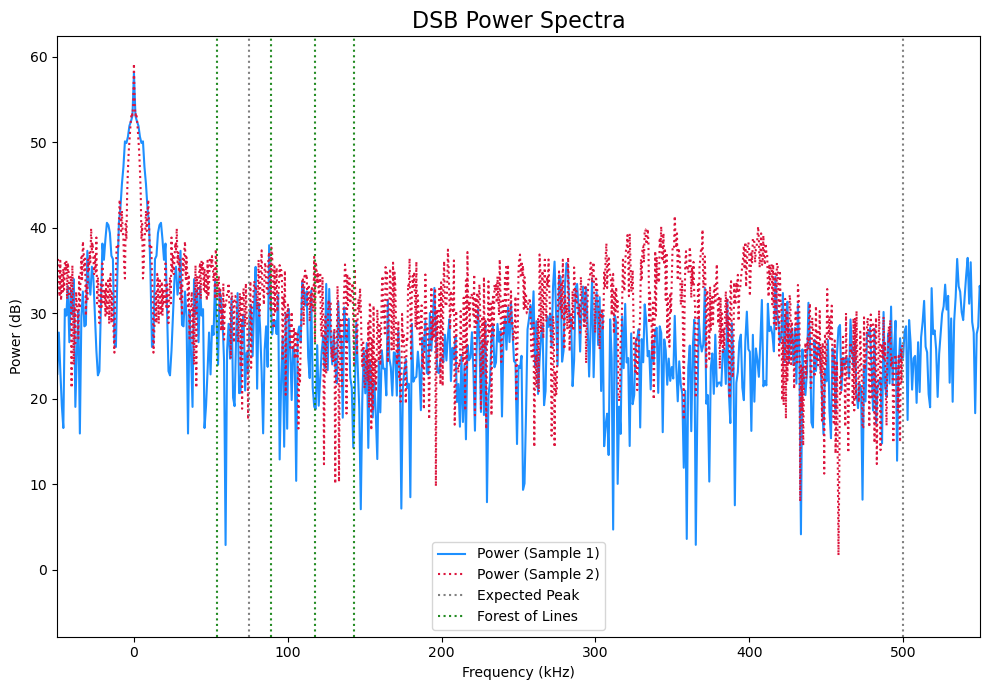

In [388]:
# ———————————————————— Double Sideband Mixer: Sample 1 ————————————————————
with np.load("run-sig1500kHz_1000kHz-sample2.0MHz-22mVpp (1).npz") as data:
    data_direct1 = data['data_direct']
    data_complex1 = data['data_complex']
    DSB_fs1 = float(data['sample_rate_mhz']) * 1e6
    sig_khz1 = data['signal_rate_khz']

    DSB1 = data_direct1
    trial_index = 0
    channel_index = 0
    DSB_signal1 = DSB1[trial_index, channel_index, :]
    N_DSB1 = len(DSB_signal1)
    dt_1 = 1 / DSB_fs1

DSB_xf1 = np.fft.fftshift(np.fft.fft(DSB_signal1))
DSB_freq1 = np.fft.fftshift(np.fft.fftfreq(N_DSB1, d=dt_1))
DSB_pow1 = np.abs(DSB_xf1)**2

# ———————————————————— Double Sideband Mixer: Sample 1 ————————————————————
with np.load("run-sig1575kHz_1500kHz-sample1.0MHz-22mVpp (1).npz") as data:
    data_direct2 = data['data_direct']
    data_complex2 = data['data_complex']
    DSB_fs2 = float(data['sample_rate_mhz']) * 1e6
    sig_khz2 = data['signal_rate_khz']

    DSB2 = data_direct2 
    trial_index = 0
    channel_index = 0
    DSB_signal2 = DSB2[trial_index, channel_index, :]
    N_DSB2 = len(DSB_signal2)
    dt_2 = 1 / DSB_fs2

DSB_xf2 = np.fft.fftshift(np.fft.fft(DSB_signal2))
DSB_freq2 = np.fft.fftshift(np.fft.fftfreq(N_DSB2, d=dt_2))
DSB_pow2 = np.abs(DSB_xf2)**2

# ———————————————————— Plotting Power Spectra ————————————————————
plt.figure(figsize=(10, 7))
plt.plot(DSB_freq1/1e3, 10*np.log10(DSB_pow1), color='dodgerblue', label='Power (Sample 1)')
plt.plot(DSB_freq2/1e3, 10*np.log10(DSB_pow2), color='crimson', label='Power (Sample 2)', linestyle=':')
plt.axvline(75, color='gray', label='Expected Peak', linestyle=':')
plt.axvline(500, color='gray', linestyle=':')

plt.axvline(54, color='forestgreen', linestyle=':')
plt.axvline(89, color='forestgreen', label='Forest of Lines', linestyle=':')
plt.axvline(118, color='forestgreen', linestyle=':')
plt.axvline(143, color='forestgreen', linestyle=':')
plt.xlabel("Frequency (kHz)")
plt.ylabel("Power (dB)")
plt.title("DSB Power Spectra", fontsize=16)
plt.legend()
plt.xlim(-50, 550)
plt.tight_layout()
plt.show()

<span style="color:darkgreen">Fig. 8</span> Power spectrum of the two samples taken using the Double Sideband (DSB) Mixer. Sample 1, shown in solid blue, was taken with the RF function generator outputting a frequency of 1500 kHz and the LO function generator outputting a frequency of 1000 kHZ. Sample 2, shown in dotted crimson, was taken with the RF function generator outputting a frequency of 1575 kHz and the LO function generator outputting a frequency of 1500 kHZ. 

The <span style="color:darkgreen">upper sideband</span> of a DSB mixer means that the frequency from the RF is greater than that of the LO, which is equivalent to:
\\[v_{RF} = v_{LO} + v\\]

And the <span style="color:darkgreen">lower sideband</span> of a DSB mixer means that the frequency from the RF is less than that of the LO, which is equivalent to:
\\[v_{RF} = v_{LO} - v\\]

In both samples, the RF frequency is greater than the LO frequency, meaning both Sample 1 and Sample 2 are uppersideband cases. Therefore, around the regions at 75 kHz and 500 kHz, we expected to see strong IF peaks; no clear isolated peaks were observed, as shown in the figure above at the gray dotted lines.

This plot presents a 'forest of lines' more than any discrete data on the DSB power spectra, which can be seen with the green dotted lines above. The three green dotted lines are all about 30 kHz apart, indicating the presence of regularly spaced spectral components. This 'forest of lines' obscures the intermediate peaks, making it harder to analyze the power spectra.

/var/folders/7r/r2sqdjn535qbfk364ll98yg00000gn/T/ipykernel_18466/3110204540.py:38: RuntimeWarning: divide by zero encountered in log10
  plt.plot(SSB_freq3/1e3, 10*np.log10(SSB_pow3), color='dodgerblue', label='Power (Sample 1)')
/var/folders/7r/r2sqdjn535qbfk364ll98yg00000gn/T/ipykernel_18466/3110204540.py:39: RuntimeWarning: divide by zero encountered in log10
  plt.plot(SSB_freq4/1e3, 10*np.log10(SSB_pow4), color='crimson', label='Power (Sample 2)', linestyle=':')


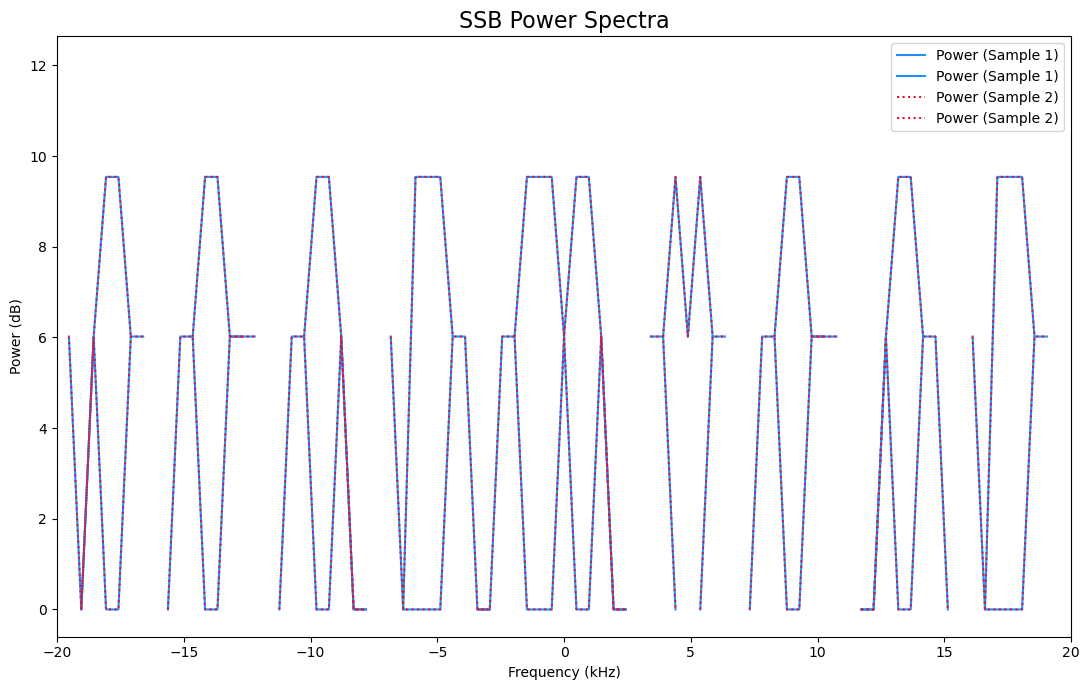

In [390]:
# ———————————————————— Single Sideband Mixer: Sample 1 ————————————————————
with np.load("run-42500kHz-1.0MHz (1).npz") as data:
    data_direct3 = data['data_direct']
    data_complex3 = data['data_complex']
    SSB_fs3 = float(data['sample_rate_mhz']) * 1e6
    sig_khz3 = data['signal_rate_khz']

    SSB3 = data_complex3
    trial_index = 0
    channel_index = 0
    SSB_signal3 = SSB3[trial_index, channel_index, :]
    N_SSB3 = len(SSB_signal3)
    dt_3 = 1 / SSB_fs3

SSB_xf3 = np.fft.fftshift(np.fft.fft(SSB_signal3))
SSB_freq3 = np.fft.fftshift(np.fft.fftfreq(N_SSB3, d=dt_3))
SSB_pow3 = np.abs(SSB_xf3)**2

# ———————————————————— Single Sideband Mixer: Sample 2 ————————————————————
with np.load("run-42500kHz-1.0MHz.npz") as data:
    data_direct4 = data['data_direct']
    data_complex4 = data['data_complex']
    SSB_fs4 = float(data['sample_rate_mhz']) * 1e6
    sig_khz4 = data['signal_rate_khz']

    SSB4 = data_complex4
    trial_index = 0
    channel_index = 0
    SSB_signal4 = SSB4[trial_index, channel_index, :]
    N_SSB4 = len(SSB_signal4)
    dt_4 = 1 / SSB_fs4

SSB_xf4 = np.fft.fftshift(np.fft.fft(SSB_signal4))
SSB_freq4 = np.fft.fftshift(np.fft.fftfreq(N_SSB4, d=dt_4))
SSB_pow4 = np.abs(SSB_xf4)**2

plt.figure(figsize=(11,7))
plt.plot(SSB_freq3/1e3, 10*np.log10(SSB_pow3), color='dodgerblue', label='Power (Sample 1)')
plt.plot(SSB_freq4/1e3, 10*np.log10(SSB_pow4), color='crimson', label='Power (Sample 2)', linestyle=':')
plt.xlabel("Frequency (kHz)")
plt.ylabel("Power (dB)")
plt.title("SSB Power Spectra", fontsize=16)
plt.legend()
plt.xlim(-20, 20)
plt.tight_layout()
plt.show()

<span style="color:darkgreen">Fig. 9</span> Power spectrum of the single-sideband mixer, sampling the real (I) and imaginary (Q) components into a complex signal, and then using a Fourier transform, in order to shift into the frequency domain.

Looking at the plot above, we are supposed to see a single dominant sideband; however, instead, the figure we have measured using an SSB power spectrum shows structured figures and discontinuous power spectra. The power of sample 1 and sample 2 is identical, and their odd structure is likely due to an issue with data collection or the processing of a complex function. Regardless, the data represents further questions that could be addressed and explored by analyzing mixed signals.

<span style="color:darkgreen; font-size:20px;">
    4.3 Interpretation
</span>

Throughout the second experiment, we investigated how single-sideband (SSB) and double-sideband (DSB) mixers combine two input signals. In our first part of the experiment, when using the DSB mixer, the plotted collected data resembles a power spectrum; however, very few distinct peaks are present, making the spectrum difficult to interpret. Because of the measured radio-frequency (RF) and local-oscillator (LO) frequencies, we expected to observe intermediate-frequency (IF) peaks near 75 kHz and 500 kHz. Neither of these expected peaks was clearly visible in the measured power spectrum for the DSB experiment.

In the second part of the experiment, we constructed and operated a single-sideband (SSB) mixer by combining two DSB mixers and introducing a phase shift through the use of a significantly longer cable in one signal path. Because of the difference in length, the longer cable takes longer for the signal to travel through (proportional to the speed of light), creating a 90-degree phase shift. After collecting and analyzing the data, the resulting power spectrum did not resemble a typical or even interpretable spectrum. This unexpected result raises questions regarding the cause of the observed behavior. One likely explanation is an issue in our data collection or signal alignment process, leading to inconsistent phase relationships between the signal paths. This could cause the two signals to get muddled together, distorting their relative frequencies. 

<span style="color:darkgreen; font-size:30px;">
    5. Conclusion
</span>

In our report, we have explored the relationships between aliasing, Nyquist criterion, converting between time domains and frequency domains using Fourier transforms,  that aliasing is directly tied to the Nyquist frequency of a sample signal, and 